In [149]:
# Import essential packages and setup inline plotting.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [150]:
# Start setting up thredds (Thematic Real-time Environmental Distributed Data Services) access 
# using siphon ncss (netCDF subset service) method.

from siphon.catalog import get_latest_access_url
gfs_catalog = "http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.html"
latest_gfs_ncss = get_latest_access_url(gfs_catalog, "NetcdfSubset")

# Set up access via NCSS
from siphon.ncss import NCSS
ncss = NCSS(latest_gfs_ncss)

# Create a query to ask for all times in netcdf4 format for
# the Temperature_surface variable, with a bounding box centered
# on lat,lon with a height and width speficied in degrees.
query = ncss.query()
lat = 34.9
lon = -94.8
width = 25
height = 20

/opt/miniconda3/envs/prod/lib/python3.6/site-packages/siphon/catalog.py:268: UserWarning: URL https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.html returned HTML. Changing to: https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.xml
  new_url))


In [151]:
ncss.variables

{'5-Wave_Geopotential_Height_isobaric',
 'Absolute_vorticity_isobaric',
 'Albedo_surface_Mixed_intervals_Average',
 'Apparent_temperature_height_above_ground',
 'Best_4_layer_Lifted_Index_surface',
 'Categorical_Freezing_Rain_surface',
 'Categorical_Freezing_Rain_surface_Mixed_intervals_Average',
 'Categorical_Ice_Pellets_surface',
 'Categorical_Ice_Pellets_surface_Mixed_intervals_Average',
 'Categorical_Rain_surface',
 'Categorical_Rain_surface_Mixed_intervals_Average',
 'Categorical_Snow_surface',
 'Categorical_Snow_surface_Mixed_intervals_Average',
 'Cloud_Work_Function_entire_atmosphere_single_layer_Mixed_intervals_Average',
 'Cloud_mixing_ratio_hybrid',
 'Cloud_mixing_ratio_isobaric',
 'Cloud_water_entire_atmosphere_single_layer',
 'Composite_reflectivity_entire_atmosphere',
 'Convective_Precipitation_Rate_surface_Mixed_intervals_Average',
 'Convective_available_potential_energy_pressure_difference_layer',
 'Convective_available_potential_energy_surface',
 'Convective_inhibition_p

In [152]:
query.all_times().accept('netcdf4').variables('Pressure_reduced_to_MSL_msl','Temperature_tropopause')
query.lonlat_box(north=lat+height/2., south=lat - height/2., east=lon + width/2., west=lon - width/2.)

# get the data!
nc = ncss.get_data(query)

In [153]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Originating_or_generating_Center: US National Weather Service, National Centres for Environmental Prediction (NCEP)
    Originating_or_generating_Subcenter: 0
    GRIB_table_version: 2,1
    Type_of_generating_process: Forecast
    Analysis_or_forecast_generating_process_identifier_defined_by_originating_centre: Analysis from GFS (Global Forecast System)
    Conventions: CF-1.6
    history: Read using CDM IOSP GribCollection v3
    featureType: GRID
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = /data/ldm/pub/native/grid/NCEP/GFS/Global_0p25deg/GFS_Global_0p25deg_20191204_0600.grib2.ncx3#LatLon_721X1440-p125S-180p0E; Translation Date = 2019-12-04T16:48:44.194Z
    geospatial_lat_min: 25.0
    geospatial_lat_max: 45.0
    geospatial_lon_min: -107.25
    geospatial_lon_max: -82.25
    dimensions(sizes): time(93), lat(81), lon(101)
    variables(di

In [154]:
temp = nc['Temperature_tropopause']
temp

<class 'netCDF4._netCDF4.Variable'>
float32 Temperature_tropopause(time, lat, lon)
    long_name: Temperature @ Tropopause
    units: K
    abbreviation: TMP
    missing_value: nan
    grid_mapping: LatLon_Projection
    coordinates: time lat lon 
    Grib_Variable_Id: VAR_0-0-0_L7
    Grib2_Parameter: [0 0 0]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Temperature
    Grib2_Parameter_Name: Temperature
    Grib2_Level_Type: 7
    Grib2_Level_Desc: Tropopause
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (93, 81, 101)
filling off

In [155]:
var='Pressure_reduced_to_MSL_msl'
ncvar = nc[var]
ncvar

<class 'netCDF4._netCDF4.Variable'>
float32 Pressure_reduced_to_MSL_msl(time, lat, lon)
    long_name: Pressure reduced to MSL @ Mean sea level
    units: Pa
    abbreviation: PRMSL
    missing_value: nan
    grid_mapping: LatLon_Projection
    coordinates: time lat lon 
    Grib_Variable_Id: VAR_0-3-1_L101
    Grib2_Parameter: [0 3 1]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Mass
    Grib2_Parameter_Name: Pressure reduced to MSL
    Grib2_Level_Type: 101
    Grib2_Level_Desc: Mean sea level
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (93, 81, 101)
filling off

In [156]:
import cartopy
import cartopy.crs as ccrs

In [157]:
from netCDF4 import num2date
# find the correct time dimension name
for d in ncvar.dimensions:
    if "time" in d: 
        timevar = d

time = num2date(nc[timevar][:],nc[timevar].units)
time[6]

real_datetime(2019, 12, 5, 0, 0)

In [158]:
# Open and read netCDF variables
lat = nc['lat']
lon = nc['lon']
data = ncvar[92, :, :]


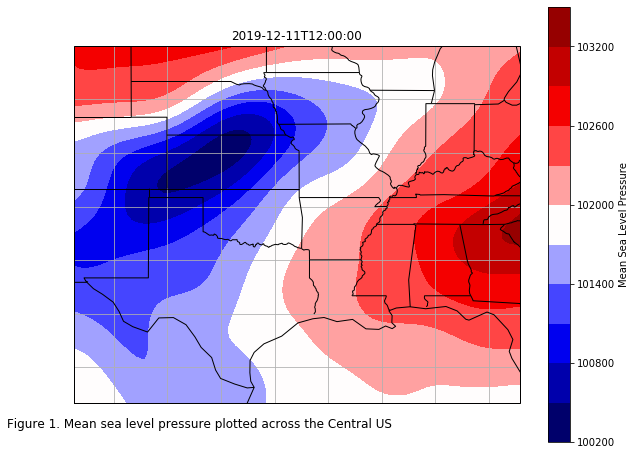

In [161]:
# Set up a lat/lon projection
proj = ccrs.PlateCarree()

# Construct figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Setting the plot size and text
plt.figtext(.3, .15,
            'Figure 1. Mean sea level pressure plotted across the Central US',
            fontsize=12, ha='center')

# define color map
cmap=plt.get_cmap("seismic")
#cmap = plt.cm.RdBu_r

# Nice high-level, human-readable abstractions for dealing with maps.
# add some common geographic features
import cartopy.feature as cfeature
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=2)
ax.add_feature(cartopy.feature.BORDERS,edgecolor='black',zorder=2)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(zorder=3)
ax.gridlines()
ax.set_title(time[58].isoformat());

# Color-filled contour plot
cs = ax.contourf(lon[:], lat[:], data[:], 10, cmap=cmap,transform=ccrs.PlateCarree(), zorder=2)

# Color bar
cbar = plt.colorbar(cs)
cbar.set_label('Mean Sea Level Pressure')